In [3]:
import os, glob, random
from medpy.metric import binary
import pandas as pd
import SimpleITK as sitk
import numpy as np
from tests.liver_seg_to_roi import get_image_path_by_id

In [7]:
manual_seg_dir =  'nnUNet_raw_data_base/nnUNet_test_data/test_label_in_nii/'
auto_seg_dir =  'nnUNet_raw_data_base/nnUNet_test_data/test_seg_in_nii/'
csv_write_path= 'csv/seg_metrics_test.csv'

vox_spacing = [2.5,0.7,0.7]     
df_init = pd.DataFrame()

label_paths = []
for r, d, f in os.walk(manual_seg_dir):
    for file in f:
        if '.nii.gz' in file :
                label_path = os.path.join(r, file)
                label_paths.append(label_path)
i=0                
for idx,label_path in enumerate(label_paths):
    d= label_path.split('/')[-1]
    pid = d.replace('_3d_liver_seg.nii.gz','')
    
    auto_seg_path = get_image_path_by_id(pid, auto_seg_dir)
    manual_seg_path = label_path
    if os.path.exists(auto_seg_path) and os.path.exists(manual_seg_path) :
        i=i+1
        print(i, pid, 'mapped ',auto_seg_path, 'yeah!!!!!!!!!\n')
        manual_seg_sitk = sitk.ReadImage(manual_seg_path)
        mskCube  = sitk.GetArrayFromImage(manual_seg_sitk)
        auto_seg_sitk = sitk.ReadImage(auto_seg_path)
        prdCube = sitk.GetArrayFromImage(auto_seg_sitk)

        dice_score = binary.dc(prdCube,mskCube)
        jc = binary.jc(prdCube,mskCube) 
        hd = binary.hd(prdCube,mskCube,vox_spacing, 1)
        assd = binary.assd(prdCube,mskCube,vox_spacing, 1)

        df = pd.DataFrame({'CT_id': pid           
                           ,  'dice_score':round(dice_score,5)
                           ,   'assd':round(assd,5)
                           ,    'jaccard':round(jc,5)
                           ,  'hausdorff':round(hd,5)            
                          },index=[0])
        df_init = df_init.append(df)
        df_init.to_csv(csv_write_path )
        print(idx,'th pid:',pid,'dsc',round(dice_score,5) ,'done into\n',csv_write_path,' \n\n\n')


0 LIDC-IDRI_0002
1 LIDC-IDRI_0002 mapped  nnUNet_raw_data_base/nnUNet_test_data/test_seg_in_nii/LIDC-IDRI_0002_img_nnunet_to_seg_top1mask.nii.gz yeah!!!!!!!!!

0 th pid: LIDC-IDRI_0002 dsc 0.81808 done into
 csv/seg_metrics_test.csv  





In [8]:
print(df_init.shape)
df_init.head()

(1, 5)


,CT_id,dice_score,assd,jaccard,hausdorff
0,LIDC-IDRI_0002,0.81808,10.5661,0.69217,119.07918


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.31808, 0.35808, 0.39808, 0.43808, 0.47808, 0.51808, 0.55808,
        0.59808, 0.63808, 0.67808, 0.71808, 0.75808, 0.79808, 0.83808,
        0.87808, 0.91808, 0.95808, 0.99808, 1.03808, 1.07808, 1.11808,
        1.15808, 1.19808, 1.23808, 1.27808, 1.31808]),
 <BarContainer object of 25 artists>)

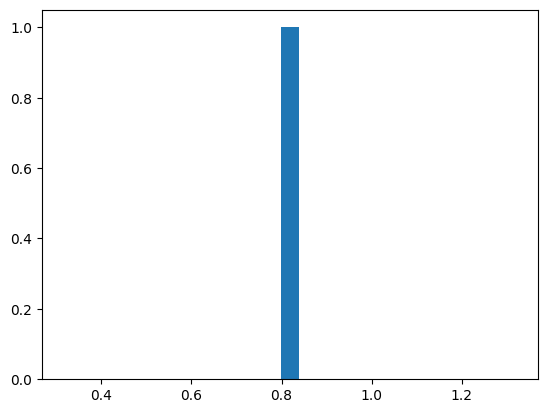

In [9]:
import matplotlib.pyplot as plt
plt.hist( df_init['dice_score'],bins = 25)
# plt.imshow

In [10]:
print(np.mean(df_init['dice_score']), np.std(df_init['dice_score']),df_init['dice_score'].shape)

0.81808 0.0 (1,)
